In [74]:
## 데이터 불러오기 
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 데이터 분할
from sklearn.model_selection import train_test_split

###회귀분석 모델 가져오기 
import statsmodels.formula.api as smf
# 회귀분석
import statsmodels.api as sm

# 의사결정 나무
from sklearn.tree import DecisionTreeRegressor
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

## 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')


# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumGothic']

# 실습 1. 모델 평가하기 

In [2]:
df_raw=pd.read_csv("./DIABETES.csv", encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [3]:
# 범주형 데이터 인코딩
df_raw['GENDER'] = pd.get_dummies(df_raw['GENDER'], drop_first=True)
df_raw

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,1,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,0,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,1,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,0,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,0,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,1,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,1,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,1,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,0,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [4]:
## 데이터 분할 
df_train, df_test=train_test_split(df_raw,test_size=0.3,random_state=1234)

# 다른 모델을 위한 데이터 분리 
df_y=df_raw['Y']
df_x=df_raw.drop('Y',axis=1,inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y, test_size=0.3, random_state=1234)

In [5]:
# 회귀분석 모델 생성 
lr_model = smf.ols(formula='Y~GENDER+BMI+BP+TCH+LTG', data=df_train)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     61.23
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           5.75e-44
Time:                        16:58:57   Log-Likelihood:                -1676.7
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     303   BIC:                             3388.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -335.8794     33.343    -10.073      0.0

In [6]:
#의사결정 나무
dt_model = DecisionTreeRegressor(min_samples_leaf = 18, min_samples_split = 70, max_depth = 4, random_state=1234 )
dt_model.fit(df_train_x, df_train_y)


DecisionTreeRegressor(max_depth=4, min_samples_leaf=18, min_samples_split=70,
                      random_state=1234)

In [7]:
## 랜덤포레스트 
rf_model= RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 15,
                                 min_samples_split = 30, max_depth = 3)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=30,
                      random_state=1234)

In [8]:
# 그레디언트 부스팅
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 4,
                                     min_samples_split = 38, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=38,
                          n_estimators=30, random_state=1234)

In [17]:
# 모델 리스트, 그래프를 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]

# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 회귀분석예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Y'], lr_y_pred))
rmse.append(mean_squared_error(df_test_y, lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Y'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'], lr_y_pred))

# 의사결정나무예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팅 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

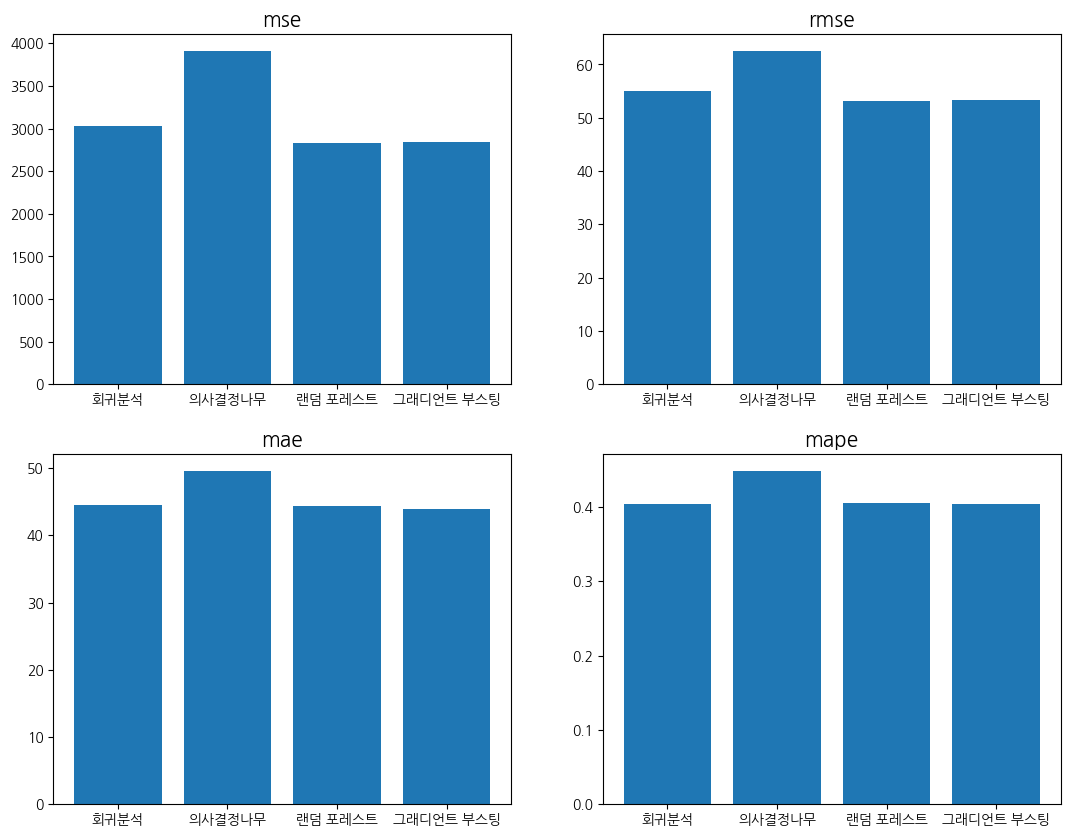

In [18]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

- 각 모델별로 성능을 분석해본 결과 랜덤포레스트나 그래디언트 부스팅이 근소하게 높은 것으로 확인되었다.
- 반면에 의사결정나무가 오차가 높았는데 이는 제일 성능이 낮은 것이다. 
- 회귀분석, 랜덤포레스트, 그래디언트 부스팅 모두 비슷한 결과물을 보여주는데 정확도상의 큰 차이는 없을 것으로 보인다.
    - 물론 근소하게 랜덤포레스트나 그래디언트 부스팅이 조금 더 높은 모습을 보여주기도하지만 
    - 두 모델이 회귀분석보다 더 복잡한 모델이라는 점을 고려한다면 반드시 선택해야 할 수준은 아닌것으로 생각된다.
    - 따라서 이러한 부분을 생각한다면 가벼운 모델인 회귀분석을 택하는 것도 좋은 선택이라 생각된다.

# 실습 2. 주성분 분석

In [21]:
df_raw=pd.read_csv("./IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
##SPECIES를 라벨인코딩을 해보자

df_raw_x = df_raw.drop("SPECIES",axis=1)
df_raw_y = df_raw["SPECIES"]


le = LabelEncoder()
df_raw_y = le.fit_transform(df_raw_y)
df_raw_y=pd.Series(df_raw_y)
df_raw_y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

- 왜 라벨인코딩을 해야하는가? 
- 우리의 목적은 설명변수를 토대로 목표변수를 맞추는 것이다. 그런데 목표변수인 종(species)는 object타입으로 연속형 변수가 아니다. 
- 여기서 분류를 위한다면 그리 문제가 되지 않지만 우리는 회귀 식을 사용할것이므로 인코딩을 해주어야한다. 
- 원핫인코딩을 사용할경우 목표변수가 늘어나는 다중 목표변수 문제가 생길수 있으므로 우리는 라벨인코딩을 해주어야한다. 
- 설명변수였다면 라벨인코딩의 경우에는 문제가 발생했을 수 있으나 목표변수이므로 큰 영향을 주지 않을것이라 생각한다. 따라서 species에 라벨인코딩을 수행하였다. 


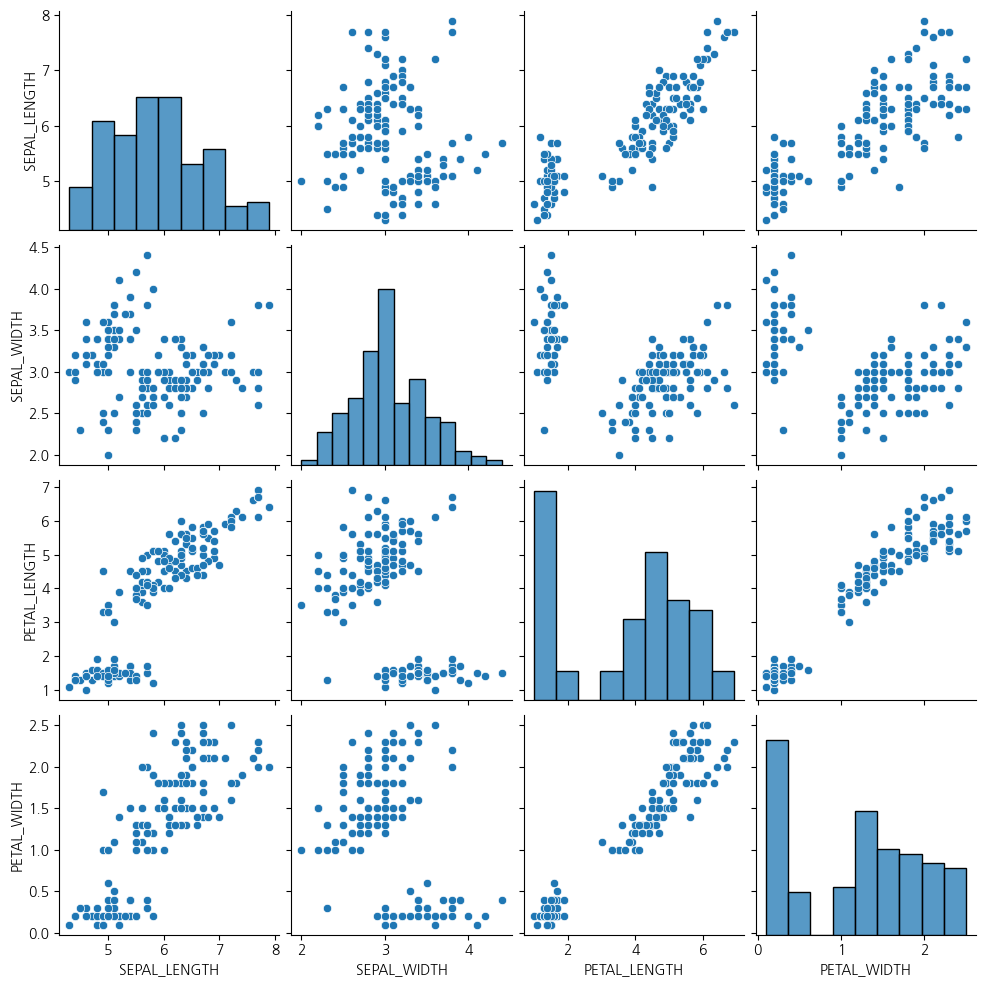

In [29]:
### 변환에 대한 산점도를 살펴보자 변수들간에 다중 공산성 문제가 발생하는가?
sns.pairplot(df_raw_x)

In [31]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


- 모델의 변수가 많지 않아 상관관계가 있을것이라 생각했지만 생각보다 높은 상관관계를 확인할수있었다. 
- 여기서 sepal은 꽃밭힘이고 petal은 꽃잎이다. 
    - 꽃받힘의 길이와 꽃잎의 너비, 꽃잎의길이는 0.8이상의 높은 상관관계를 가진다. 
    - 꽃잎의 길이와 꽃잎의 너비는 0.9이상의 높은 상관관계를 가진다. 
    


- 우리가 주성분 분석을 하는 이유가 바로 이런점이다. 우리의 목적은 pca를 통해서 새로운 파생변수를 만들어 모델의 설명력을 높이고 다중공산성문제를 해결하는 것이다. 
- 기존의 우리가 배웠던 변수 선택 방식에서는 변수를 삭제시킴으로서 이를 해결하려하였으나 이경우 데이터를 상실하게 되고 더불어 위처럼 변수가 적은 데이터셋의 경우 유의미한 데이터를 잃어버릴 수 있는 문제를 발생시킨다.


In [32]:
## 요약통계량을 확인 해보고 scale변환을 실시해보자
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


- 우리가 생각하기로는 꽃잎과 꽃받힘이라는 특성상 변수 데이터의 범위가 다를 것이라 생각한다. 
- 두 변수 모두 cm이라는 동일한 척도를 사용하지만 변수의 범위가 다르므로 이를 정규화시켜주어야 한다. 

In [33]:

x_cols = df_raw_x.columns


scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols ) 
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [34]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


- 일반적으로 사용하는 스탠다드 스케일러를 통해서 표준화를 실시하였다. 
- 표준화란 데이터를 평균은 0 표준편차는 1의 데이터로 변환을 하는 과정을 의미한다. 
- 위 요약 통계량에서 평균은 0 표준편차는 1로 확인이 되었으므로 표준화 과정이 잘 수행되었다고 판단할 수 있을 것이다.

In [35]:
## 이제 주성분 분석을 위한 데이터 구성을 얼추 마쳤으므로 주성분 분석을 실시하여보자


pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print(f"PCA Data :\n {nd_pca[:5]}")
# 생성된 주성분 점수 Row, Column 개수 확인
print(f"Shape :\n {nd_pca.shape}")

PCA Data :
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape :
 (150, 4)


- 아이리스 데이터 셋의 경우 목표변수를 제외한 4개의 변수를 가지고 있다. 
- 이를 통해 본다면 최대 4개의 주성분을 만들어낼 수 있고 이를 통해 주성분 점수를 얻을수 있었다. 
- 따라서 지금부터는 이 점수를 토대로 적정 주성분 수와  주성분을 선택하는 것이 중요하겠다.

In [37]:
# 주성분 저장하기 

df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4"])

# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [38]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


- 주성분의 개수와 선택을 위새서는 주성분의 고유값과 누적비율을 토대로 선택이 된다. 
- 여기서는 책을 토대로 생각 해보자 책에서는 고유값 기준 1이상, 누적 비율 0.8이상을 기준으로 잡았다고 설명되어있다. 
- 아직 이해가 부족하여 이러한 수치적인 부분에서의 설명을 참조하지는 못하겟으나 우리는 선택을 해야한다. 
- 1. 고유값 1 이상의 변수 1개를 선택할것이냐
- 2. 고유값 누적 비율 0.8을 만족하는 변수 2개를 선택할 것이냐


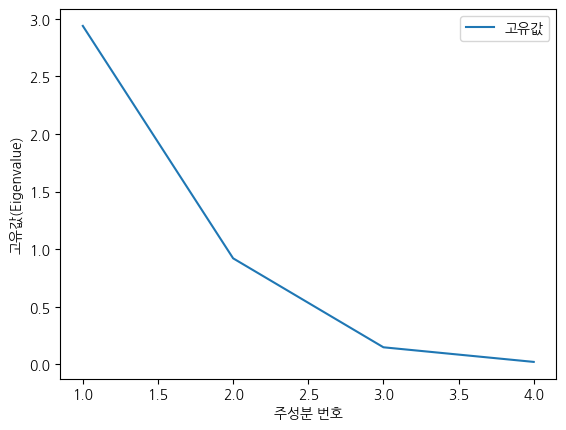

In [39]:
# Scree Plot 
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")
# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

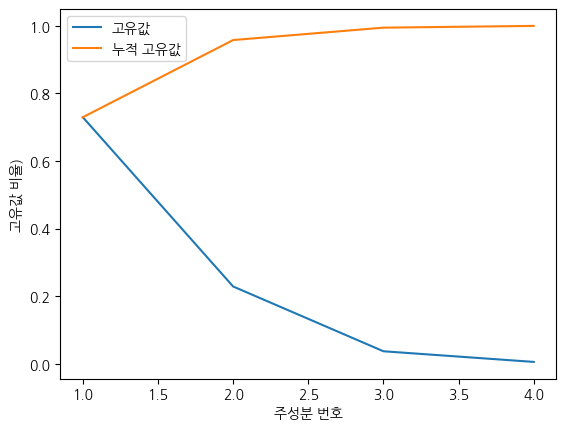

In [40]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["EigenValueRatio"], label="고유값")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

- 두 모델의 그래프를 이용하여 찾아보았다. 책에서와 유사한 방식으로 보았을 때 고유값이 급격하게 감소하는 지점부터 모델에 반영한다고 해보자 
- 우리는 2개의 주성분을 선택할 것이다.

In [41]:
# 주성분 분석 데이터의 변수 이름  
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
# 주성분 Prin1~4까지의 고유벡터 저장
# 전치 결과pd.DataFrame(pca.components_, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                            columns = ["Prin1","Prin2","Prin3","Prin4"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


- 꽃잎의 길이와 넓이 사이에 음의 연관성을 갖는다. 

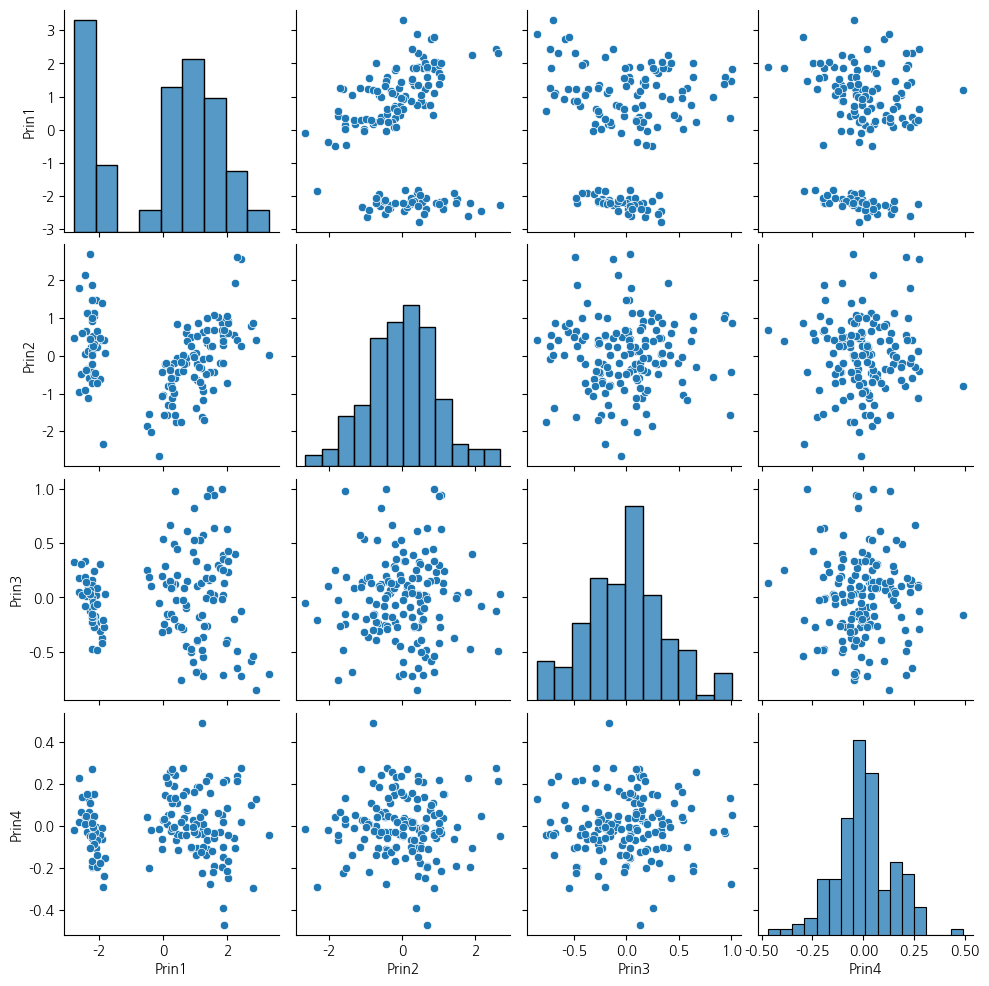

In [42]:
# 산점도 행렬
sns.pairplot(df_pca)

In [43]:
# 상관계수
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


- 주성분들이 서로 독립성을 가지고 있다. 상관계수가 전혀 나타나지 않는다.
- 상관계수 =0

In [46]:
# 다중선형 회귀분석: 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           8.46e-83
Time:                        21:00:19   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1865      0.205      0.910   

In [47]:
# 다중선형 회귀분석: Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           8.46e-83
Time:                        21:01:06   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0000      0.018     55.899   

- 먼저 두개의 선형회귀 모델을 비교해보도록 한다. 
- 두 선형 모델은 각각 모든 변수를 넣은 선형 회귀모델과 표준화 작업을 거친 선형회귀 모델이다.
- 두 모델 모두 설명력이 0.92로 매우 높은 설명력을 지니고 있음을 확인할수 있다.
- 여기서 설명계수는 다중 회귀분석이므로 수정 결정계수를 사용하였다. 
- 그런데 꽃받힘의 경우 길이와 너비가 각각 p밸류 값을 초과하여 회귀계수로의 영향력이 없음을 나타내준다. 따라서 꽃바힘의 길이와 너비는 회귀 값으로 사용하기에 적절치 않아 보인다. 
- 반면에 꽃잎의 길이와 너비는 둘다 회귀계수로서의 영향력을 가지고 잇음을 보여준다.

In [50]:
# 다중선형 주성분 회귀분석: 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ["Prin1", "Prin2"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     610.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           6.30e-72
Time:                        21:09:10   Log-Likelihood:                -15.139
No. Observations:                 150   AIC:                             36.28
Df Residuals:                     147   BIC:                             45.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.022     45.297      0.0

- 주성분 분석으로 새로운 파생변수를 만들어 내었다. 주성분 변수 1과 2를 선택하여 사용하였는데 모델의 검증 결과 다음과 같이 나타났다. 
- 모델의 성능은 0.03 정도 하락하였다. 작은 수치이지만 크게 영향은 없을거라 판단한다. 
- 다만 주성분 2의 경우 p값이 높게 나와 적절한 설명을 갖추지 못했으며 회귀계수로의 영향력을 발휘하기 어렵다. 
- 위와 같은 경우에는 주성분 1만으로도 충분히 아이리스 품종을 분석하는 것이 가능할것으로 생각된다.

## 실습 2-2 모델 사용해보기 

In [68]:
reg_model.predict([1,2,0])

array([1.90298926])

In [65]:
print("df_pca[x_var] shape:", df_pca_const.shape)
print("df_raw_y shape:", df_raw_y.shape)

df_pca[x_var] shape: (150, 3)
df_raw_y shape: (150,)


- 0.9에 달하는 설명력을 갖춘 모델이 어떻게 결과를 내는 지 궁금해졌다. 따라서 모델.predict로 표준화 비슷한 값을 넣어주어 임의로 결과를 출력했다. 이모델은 2'virginica'라고 추측한다는 것을 알수 있었다.

# 실습 3. 시계열 분석

In [134]:
## 데이터 불러오기 
df_raw=pd.read_csv("./df_USD.csv",encoding='euc-kr')
df_raw.head()
df_raw['APPL_DATE']=pd.to_datetime(df_raw['APPL_DATE'])

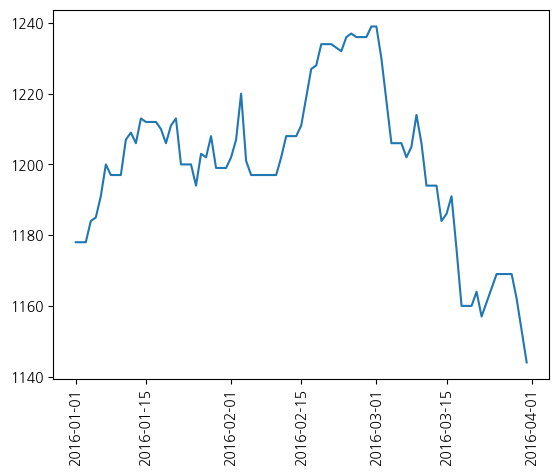

In [135]:
## 그래프 생성 
plt.plot(df_raw['APPL_DATE'],df_raw['STD_RATE'])
plt.xticks(rotation=90)
plt.show()

In [136]:
#usd 데이터의 index를 appl_date로 설정

df_USD=df_raw.set_index("APPL_DATE")
df_USD

,STD_RATE
APPL_DATE,
2016-01-01,1178
2016-01-02,1178
2016-01-03,1178
2016-01-04,1184
2016-01-05,1185
...,...
2016-03-27,1169
2016-03-28,1169
2016-03-29,1162


In [85]:
df_USD.shape

(91, 1)

In [88]:
# ## 데이터 분할 
# df_USD_train,df_USD_test=train_test_split(df_USD,test_size=0.1,random_state=1234)
# print(df_USD_train.shape)
# print(df_USD_test.shape)

(81, 1)
(10, 1)


In [137]:
train_size =0.9
len_idx = len(df_USD.index)

mask = (np.arange(len_idx) / len_idx) < train_size 
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [138]:
# mask를 이용한 데이터 분할
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]
print("shape of train data: {}".format(df_USD_train.shape))
print("shape of test data: {}".format(df_USD_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


- 데이터 구성을 완료하였다. 해당 데이터는 구간시간동안의 미국 달러 데이터이다. 
- 데이터를 책에서 나온대로 0.1과 0.9 비율로 분할하였다.
- 책에 나온대로 MASK를 이용한 분리를 이용했다. 
- train_test_split을 사용하면 랜덤으로 인덱스가 섞이는 문제가 발생한다.

<Axes: xlabel='APPL_DATE'>

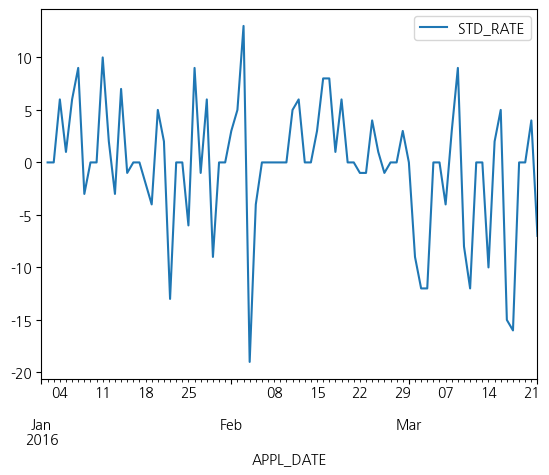

In [139]:
# 1차 차분 
df_USD_diff1=df_USD_train-df_USD_train.shift(1)
df_USD_diff1.plot()

<Axes: xlabel='APPL_DATE'>

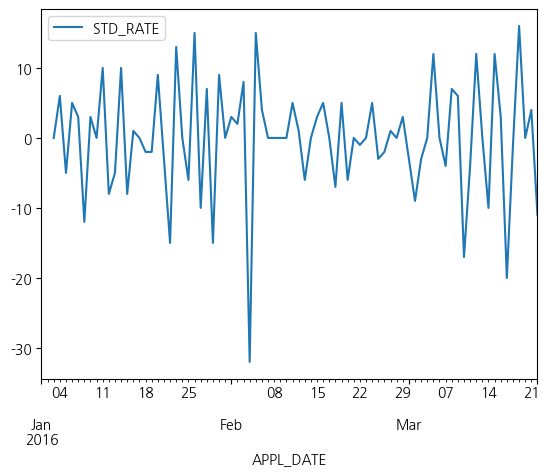

In [140]:
# 2차 차분
df_USD_diff2=df_USD_train-2*(df_USD_train.shift(1))+(df_USD_train.shift(2))
df_USD_diff2.plot()

- 두번의 차분을 통해 데이터의 정상성을 확보하였다. 

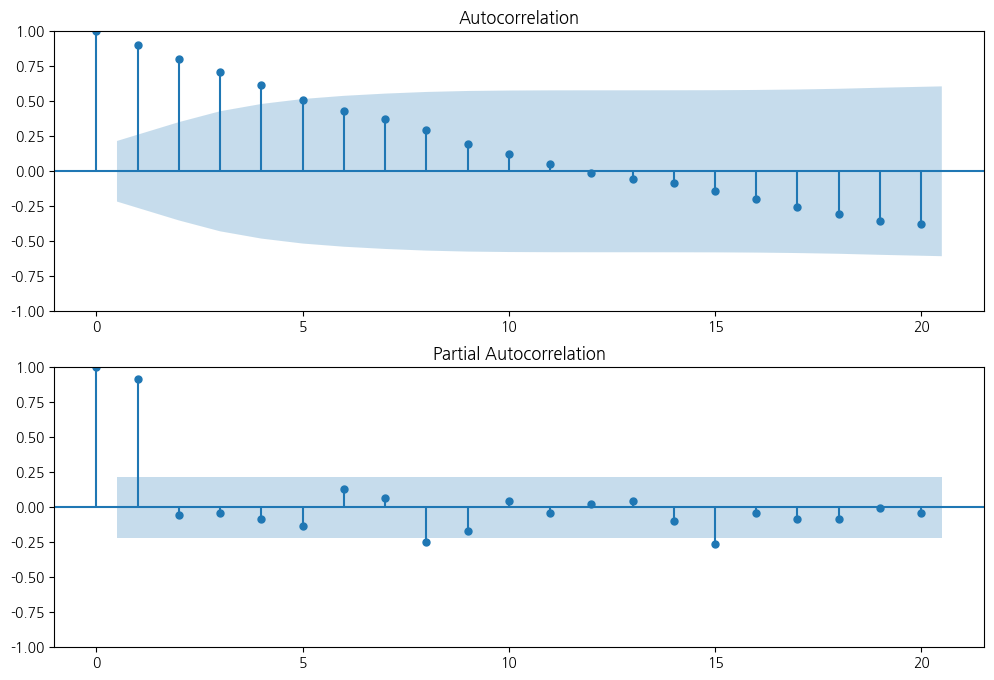

In [141]:
# 자기회귀 최대 p기간 지정
lag_size = 20
fig = plt.figure(figsize=(12,8))

# acf 그래프를 그릴 공간 생성
ax1 = fig.add_subplot(211)

# 자기상관 함수 그래프 plot_acf 함수 사용 
fig = plot_acf(df_USD_train, lags=lag_size, ax=ax1) # ["STD_RATE"] 생략 가능

# pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)

# 부분 자기상관 함수 그래프 plot_pacf 함수 사용 
fig = plot_pacf(df_USD_train, lags=lag_size, ax=ax2) # ["STD_RATE"] 생략 가능


- 왜 차분을 사용하지 않았는가 궁금해졌다. 차분을 사용한 데이터의 경우 정상성을 확보하였으나 원본데이터의 경향을 확인하는데 어려움을 겪을 수 있다. 
- 따라서 여기에서는 차분을 사용하지 않은 것으로 생각된다. 
- 모델의 p,q를 지정해주어야하는데 그래프의 절단면을 보아 ACF는 13정도에서 양에서 음으로 변화하며 PACF는 1이후 극단적인 절단면을 보여주므로  p=1 q=0으로 선택하는 것이 적절하여 보인다.

In [142]:
ts_model_usd = ARIMA(df_USD_train, order = (1, 2, 0))  # (p,d,q) 지정

# 데이터 적합
ts_result_usd = ts_model_usd.fit()
print(ts_result_usd.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.804
Date:                Thu, 31 Oct 2024   AIC                            553.608
Time:                        01:10:18   BIC                            558.372
Sample:                    01-01-2016   HQIC                           555.518
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.124     -3.047      0.002      -0.618      -0.134
sigma2        56.2767      7.107      7.919      0.000      42.348      70.206
Ljung-Box (L1) (Q):                   2.21   Jarque-

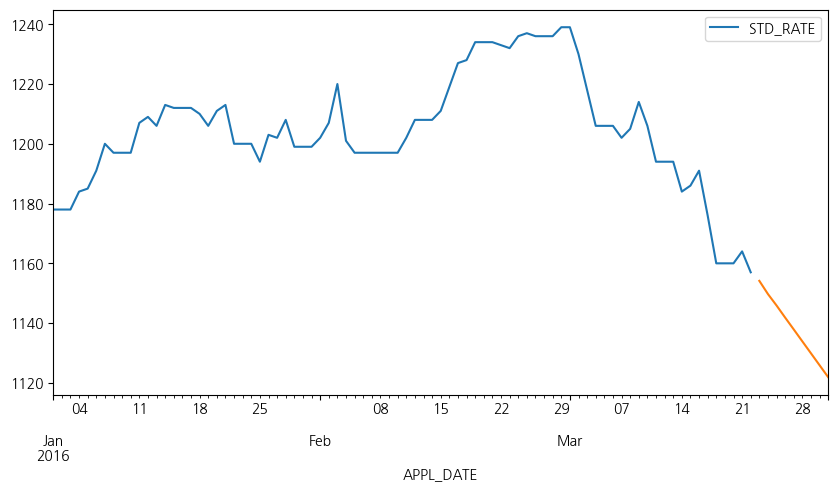

In [143]:
# 예측 시작/종료 날짜 지정
start_time =df_USD_test.index.min() 
end_time = df_USD_test.index.max() 
fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_USD_train.plot(ax = ax)
# 예측 그래프 생성 함수, start: 예측 시작, end: A예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_usd.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

- 변수의 유의성을 판단하였다. 계수가 P밸류값이 낮으므로 유의성이 있다고 판단하였고 회귀계수의 영향력도 판단하엿을때 유의하다고 판단하였다.

In [149]:
# 전체 기간의 실제값, 예측값 확인 
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_usd.predict(start=start_time, end=end_time, typ= 'levels')
df_merge = df_USD  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178,NaN
2016-01-02,1178,NaN
2016-01-03,1178,1178.040179
2016-01-04,1184,1178.020024
2016-01-05,1185,1186.035078


<Axes: xlabel='APPL_DATE'>

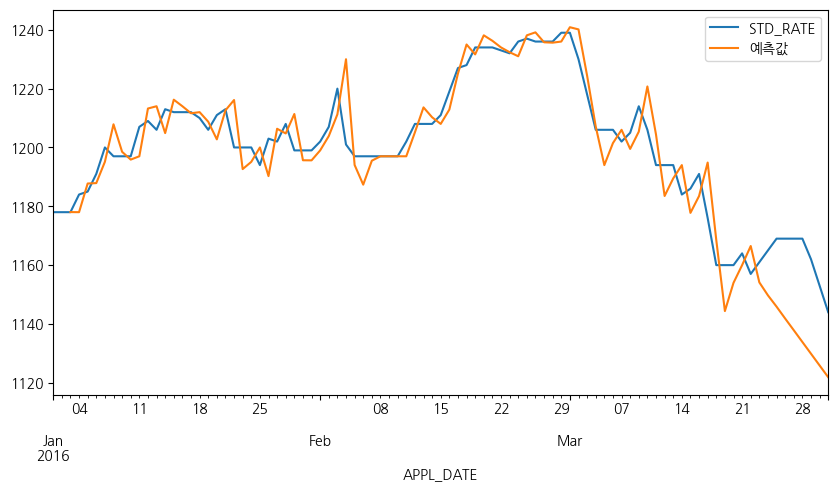

In [147]:
# 추세 그래프 생성 및 확인
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10, 5))

- 현재 그래프상에서 존재하는 그래프와 유사하게 추종하다가 예측되는 부분에서 그래프와 어긋남이 확인된다. 차이가 확연해 보인다.

In [148]:
ts_model_usd = ARIMA(df_USD_train, order = (0, 2, 1))  # (p,d,q) 지정

# 데이터 적합
ts_result_usd = ts_model_usd.fit()
print(ts_result_usd.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -258.895
Date:                Thu, 31 Oct 2024   AIC                            521.789
Time:                        01:16:33   BIC                            526.553
Sample:                    01-01-2016   HQIC                           523.699
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9220      0.053    -17.368      0.000      -1.026      -0.818
sigma2        36.9957      4.740      7.805      0.000      27.705      46.286
Ljung-Box (L1) (Q):                   0.06   Jarque-

- 마찬가지로 파라미터를 바꿔 MA 모델에 적용시켜 보았다.회귀계수의 유의성을 판단하였고 유의하다고 판단되어 사용해보았다.

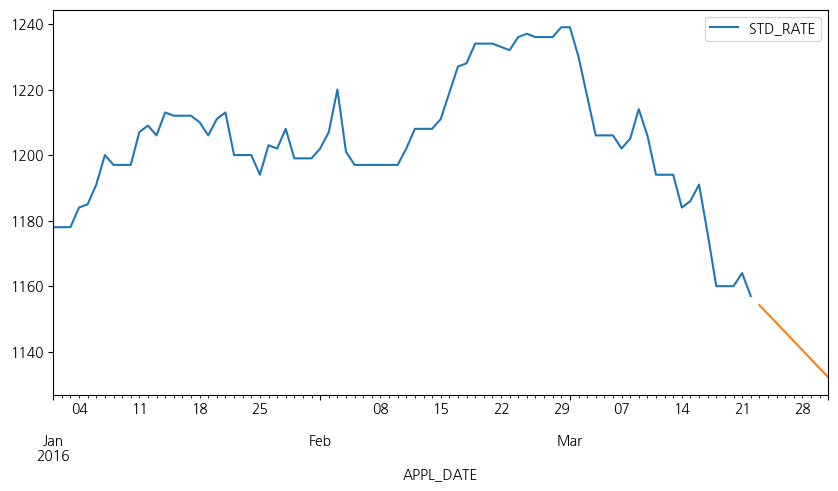

In [150]:
# 예측 시작/종료 날짜 지정
start_time =df_USD_test.index.min() 
end_time = df_USD_test.index.max() 
fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_USD_train.plot(ax = ax)
# 예측 그래프 생성 함수, start: 예측 시작, end: A예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_usd.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

In [151]:
# 전체 기간의 실제값, 예측값 확인 
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_usd.predict(start=start_time, end=end_time, typ= 'levels')
df_merge = df_USD  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178,NaN
2016-01-02,1178,NaN
2016-01-03,1178,1178.040179
2016-01-04,1184,1178.020024
2016-01-05,1185,1186.035078


<Axes: xlabel='APPL_DATE'>

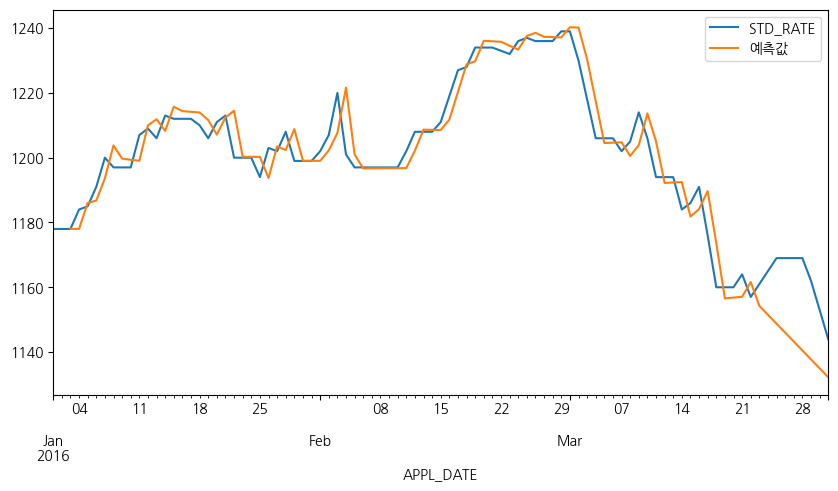

In [152]:
# 추세 그래프 생성 및 확인
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10, 5))

- 앞서보았던 모델과 큰 차이가 없음을 확인하였고 여전히 예측 부분에서 실제값과 확연히 다른 것을 확인할수 잇었다.

- auto arima를 사용해 보고 싶었으나 numpy 패키지 문제로 사용하지 못하였다.